# **Chapter 9 비지도 학습**

### **[개념 정리]**

#### **9.2 가우시안 혼합**

가우시안 혼합 모델(Gaussian mixture model)(GMM)

: 샘플이 파라마티가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

> 1개의 가우시안 분포에서 생성된 모든 샘플을 1개의 클러스터를 형성
>    - 일반적으로 타원형 클러스터

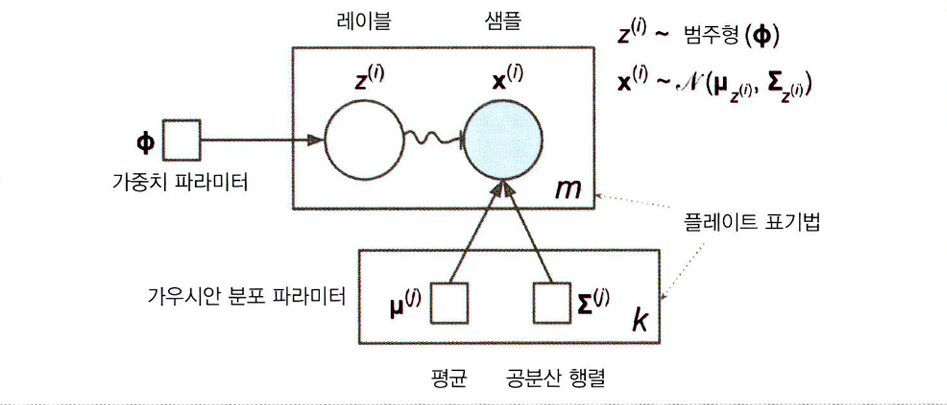
- 가우시안 혼합 모델의 그래프 모형, 파라미터(사각형), 확률 변수(원), 조건부 의존성(실선 화살표)
- 원: 확률 변수
- 사각형: 고정값 (즉, 모델의 파라미터)
- 큰 사각형: 플레이트(plate) -> 이 사각형 안의 내용이 여러 번 반복됨을 나타냄
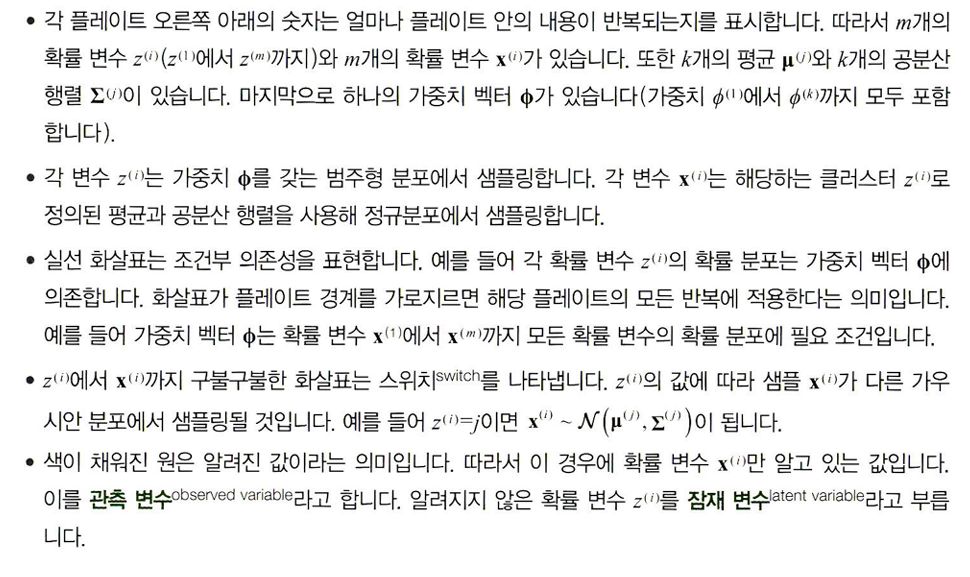

--> 데이터셋 $X$가 주어지면, 가중치 $\phi$와 전체 분포의 파라미터 $\mu^{(1)}$에서 $\mu^{(k)}$까지와 $\sum^{(1)}$에서 $\sum^{(k)}$까지를 추정

- 사이킷런 GaussianMixture 클래스

> 기댓값-최대화(expectation-maximization)(EM) 알고리즘 사용
>
> : 클러스터 파라미터를 랜덤하게 초기화하고, 수렴할 때까지 두 단계 반복

1. 샘플을 클러스터에 할당 (기댓값 단계)
2. 클러스터를 업데이트 (최대화 단계)

> k-평균과의 차이점
> - k-평균은 하드 클러스터링 할당, EM은 소프트 클러스터 할당
>   1. 기댓값 단계 -> 현재 클러스터 파라미터에 기반하여 각 클러스터에 속할 확률 예측
>   2. 최대화 단계 -> 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트
>      - 클러스터 업데이트는 책임이 가장 많은 샘플에 크게 영향을 받음
>   
>   --> 클러스터에 속할 추정 확률로 샘플에 가중치 적용
>   - 해당 확률을 샘플에 대한 *클러스터의 책임*이라 부름

- 하드 군집: 새로운 샘플을 가장 비슷한 클러스터에 손쉽게 할당 `predict()` 메서드 사용
- 소프트 군집: 특정 클러스터에 속할 확률을 예측 `predict_proba()` 메서드 사용

가우시안 혼합 모델 = 생성 모델(generative model)
- 새로운 샘플 생성 가능 (반환된 샘플은 클러스터 인덱스 순으로 정렬되어 있음)

EM의 최적 솔루션을 위한 방법
- 알고리즘이 학습할 파라미터 개수를 제한해야함 -> 클러스터의 모양과 방향의 범위 제한
> 사이킷런 covariance_type 매개변수 설정
> 1. "spherical": 모든 클러스터가 원형, 하지만 지름은 다를 수 있음(즉, 분산이 다름)
> 2. "diag": 클러스터는 크기에 상관없이 어떤 타원형도 가능. 하지만 타원의 축이 좌표 축과 나란해야 함(즉, 공분산 행렬이 대각 행렬)
> 3. "tied": 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐(즉, 모든 클러스터는 동일한 공분산 행렬을 공유)
> 4. 기본값 "full": 각 클러스터는 모양, 크기, 방향에 제약이 없음

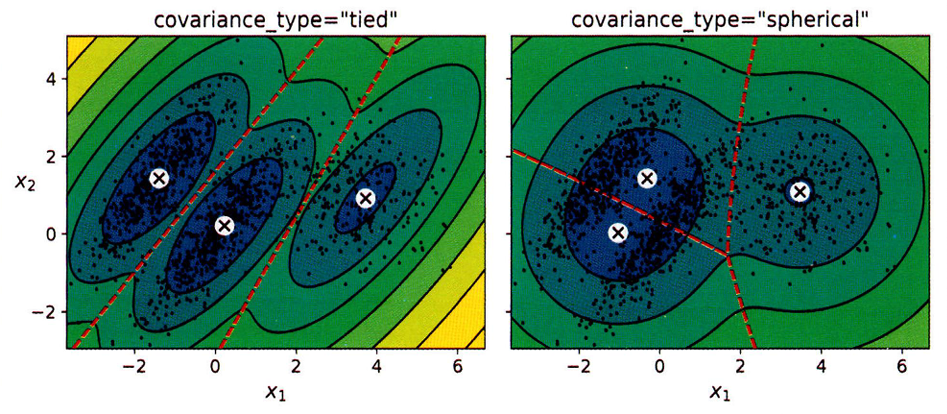

#### **9.2.1 가우시안 혼합을 사용한 이상치 탐지**

이상치 탐지(outlier detection)

: 보통과 많이 다른 샘플을 감지하는 작업

가우시안 혼합 모델에서의 이상치 탐지
- 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 판단 -> 사용할 밀도 임곗값 설정 필요

특이치 탐지(novelty detection)

: 이상치로 오염되지 않은 '깨끗한' 데이터셋에서 훈련한다는 점이 이상치 탐지와 다름
- 이상치 탐지는 데이터셋을 정제하는 데 자주 사용

#### **9.2.2 클러스터 개수 선택하기**

- k-평균 -> 이너셔, 실루엣 점수를 이용해 적절한 클러스터 개수 선택

가우시안 혼합의 클러스터 개수 선택 지표
> 1. BIC(Bayesian information criterion): $BIC = log(m)p - 2log(\hat L)$
> 2. AIC(Akaike information criterion): $AIC = 2p - 2log(\hat L)$
>    - $m$: 샘플의 개수
>    - $p$: 모델이 학습할 파라미터 개수
>    - $\hat L$: 모델의 가능도 함수(Likelihood function) 최댓값
> 
> --> BIC, AIC 모두 학습할 파라미터가 많은 (즉 클러스터가 많은) 모델에게 벌칙을 가하고, 데이터에 잘 학습하는 모델에게 보상을 더 함

#### **9.2.3 베이즈 가우시안 혼합 모델**

베이즈 가우시안 혼합 모델

: 최적의 클러스터 개수를 수동으로 찾지 않고, 불필요한 클러스터의 가중치를 0으로, 또는 0에 가깝게 만드는 BayesianGaussianMixture 클래스 이용

> 이 모델에서는 클러스터 파라미터(가중치, 평균, 공분산 행렬 등)는 더는 고정된 모델 파라미터가 아니라 클러스터 할당과 같이 잠재 확률 변수로 취급
> - $\dot{z}$는 클러스터 파라미터와 클러스터 할당을 모두 포함


### **[필사]**

#### **9.2 가우시안 혼합**

In [5]:
import numpy as np
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,noise=0.05)

In [22]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,10
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


In [24]:
gm.weights_

array([0.20251168, 0.18734924, 0.61013908])

In [26]:
gm.means_

array([[-0.74180688,  0.55449273],
       [ 1.77853141, -0.02581897],
       [ 0.52124343,  0.23301014]])

In [28]:
gm.covariances_

array([[[ 0.05286535,  0.06234932],
        [ 0.06234932,  0.08766508]],

       [[ 0.03988835,  0.05181894],
        [ 0.05181894,  0.08176314]],

       [[ 0.1845218 , -0.11329438],
        [-0.11329438,  0.29317546]]])

In [34]:
gm.converged_

True

In [38]:
gm.n_iter_

19

In [40]:
gm.predict(X)

array([2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2,
       0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1,

In [42]:
gm.predict_proba(X)

array([[1.88443601e-033, 1.69028580e-097, 1.00000000e+000],
       [1.05371205e-224, 9.04065551e-001, 9.59344495e-002],
       [2.67211185e-207, 8.67012940e-001, 1.32987060e-001],
       ...,
       [9.94518938e-072, 3.10381959e-046, 1.00000000e+000],
       [2.30141510e-040, 4.82260781e-087, 1.00000000e+000],
       [1.56324283e-024, 1.21746592e-111, 1.00000000e+000]])

In [44]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.65767378, -0.12215319],
       [ 0.39368895,  0.62861975],
       [ 0.70387856, -0.3033702 ],
       [ 0.89527579, -0.10907134],
       [ 0.45186141,  0.15042092],
       [ 0.62957118, -0.26975342]])

In [46]:
y_new

array([1, 2, 2, 2, 2, 2])

In [48]:
gm.score_samples(X)

array([-1.27522958e+00, -9.12481561e-01, -1.17128387e+00, -1.44387801e+00,
       -4.37441269e-01, -1.53338380e+00, -2.21449502e+00, -1.68105777e+00,
       -1.24039198e+00, -1.03353774e-01, -3.53258658e-01, -5.50510714e-01,
       -1.64891373e+00, -2.18447772e+00, -1.98379249e+00, -1.93605648e-02,
       -4.81260828e-01, -6.94103142e-01, -4.74214420e-01, -1.79181351e+00,
       -3.07519756e-01, -1.42868885e+00, -2.74041641e+00, -1.74920580e+00,
       -1.41035225e+00, -1.68309062e+00, -1.28122613e+00, -1.77758237e+00,
       -1.34188093e+00, -1.55765385e+00, -2.98239912e-01, -8.72273078e-01,
       -1.18034772e+00, -8.49847566e-01, -1.42437458e+00,  6.44023522e-03,
       -1.99525871e+00, -2.69434528e-01, -3.77684807e-01, -1.80608995e+00,
       -1.98838372e+00,  1.60039907e-01, -1.90756550e+00, -1.73251763e+00,
       -1.72503771e+00, -1.62147541e+00, -8.13990004e-01, -1.68641984e+00,
       -5.53002849e-02, -1.97693197e+00, -1.14337495e+00, -1.75643882e+00,
       -1.50612579e+00, -

`score_samples()` 해당 위치의 확률 밀도 함수(PDF)의 로그 예측
    - 점수가 높을 수록 밀도가 높음

#### **9.2.1 가우시안 혼합을 사용한 이상치 탐지**

In [55]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

#### **9.2.2 클러스터 개수 선택하기**

In [64]:
gm.bic(X)

2745.527710234284

In [66]:
gm.aic(X)

2662.0958704915874

#### **9.2.3 베이즈 가우시안 혼합 모델**

In [77]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\won-0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

array([0.15, 0.15, 0.12, 0.18, 0.04, 0.11, 0.13, 0.11, 0.  , 0.  ])

클러스터가 8개 필요하다는 것을 감지